# Aprendizaje Computacional  

## Mario Graff (mgraffg@ieee.org, mario.graff@infotec.mx)  
## [https://github.com/ingeotec](https://github.com/ingeotec)
## [https://github.com/mgraffg](https://github.com/mgraffg)
## CONACYT - INFOTEC 

# Temas

1. Introducción
2. Aprendizaje supervisado
3. Métodos paramétricos
4. Métodos no-paramétricos
5. Máquinas de kernel
6. Métodos no convencionales de aprendizaje
7. Diseño y análisis de experimentos de aprendizaje
8. Aplicaciones

# Aprendizaje Supervisado

2.1. Introducción  
2.2. Aprendizaje como búsqueda  
2.3. Definiciones  
2.4. Actividades  


# Aprendizaje Supervisado

* Encontrar una función $h^*$ que se comporta como $f$
* Utilizando lo siguientes elementos  
  * $\mathcal X$ conjunto de entrenamiento
  * $\mathcal V$ conjunto de validación
  * $\mathcal P$ conjunto público o test set

* $\mathcal X=\{x_t, r_t\}_t^N$  
  $x_t$ representa un objeto  
  $r_t=f(x_t)$ es su respuesta

# Aprendizaje Supervisado

* $\mathcal H$ clase de hipótesis  
* $L$ función de error  
* $E(h \mid \mathcal X) = \sum_{x, r \in \mathcal X} L(r, h(x))$ error empírico.  


* $h^* = \text{argmin}_{h \in \mathcal{H}} E(h \mid \mathcal X)$

# Características

* Normalmente $h \in \mathcal{H}$ tiene la forma  
  $h: (x_1, x_2, \ldots, x_d) \rightarrow r$ donde $x_i \in \mathbb R$  
  * $r \in \{0, 1\}$ en clasificación binaria  
  * $r \in \{0, 1\}^K$ en clasificación multi-clase o multi-etiqueta  
  * $r \in \mathbb R$ para regresión

# Aprendiendo por ejemplos

* Problema binario - dos clases
* Diagnóstico médico
* Presenta la condición - _ejemplo positivo_
* Sano - _ejemplo negativo_ 

# Representación

In [1]:
import pandas as pd
import numpy as np
pos = np.random.multivariate_normal([0, 0.3], 
                                    [[0.3, 0.1], [0.1, 0.3]], size=100)
neg = np.random.multivariate_normal([2.3, -0.3], 
                                    [[0.1, 0.01], [0.01, 0.3]], size=100)
xpos = [x[0] for x in pos[:10]]
ypos = [x[1] for x in pos[:10]]
x_y_pos = np.array([xpos, ypos, ['Positiva' for x in range(10)]]).T
xneg = [x[0] for x in neg[:10]]
yneg = [x[1] for x in neg[:10]]
x_y_neg = np.array([xneg, yneg, ['Negativa' for x in range(10)]]).T
d = np.concatenate([x_y_pos, x_y_neg])
pd.DataFrame(d[:10], columns=['x', 'y', 'Clase'])

,x,y,Clase
0,0.845966016721,0.2272219628,Positiva
1,-0.2223811629,0.376604551286,Positiva
2,-0.6955000752,-0.0866044311334,Positiva
3,-0.538578236827,0.510970126201,Positiva
4,0.186004500306,0.884731365035,Positiva
5,-0.221582389895,0.867895604877,Positiva
6,0.530227463791,1.52127881101,Positiva
7,0.409466783697,0.562919467398,Positiva
8,-0.846729869285,-0.620875090655,Positiva
9,0.224318635511,0.331025280914,Positiva


# Clasificación

Populating the interactive namespace from numpy and matplotlib


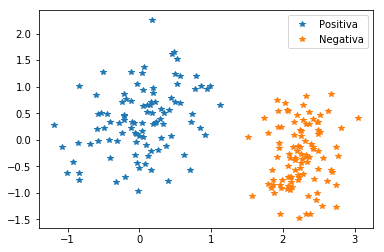

In [2]:
%pylab inline
pylab.plot([x[0] for x in pos], [x[1] for x in pos], '*')
pylab.plot([x[0] for x in neg], [x[1] for x in neg], '*')
pylab.legend(['Positiva', 'Negativa'])

# Regresión

In [3]:
x = np.linspace(-10, 10, 100)
y = 5.3 * np.sin(12.2 * x) + 2.3 * x - 1.1 * x**2
pd.DataFrame((np.vstack([x, y]).T)[:10], columns=['x', 'y'])

,x,y
0,-10.000000,-135.643180
1,-9.797980,-128.953141
2,-9.595960,-119.443999
3,-9.393939,-123.966561
4,-9.191919,-109.752649
5,-8.989899,-111.036344
6,-8.787879,-107.215624
7,-8.585859,-96.174520
8,-8.383838,-101.813805
9,-8.181818,-88.988654


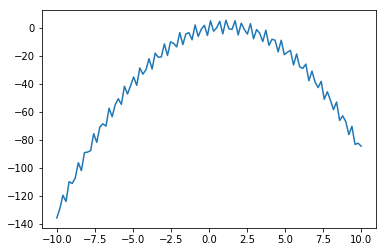

In [4]:

plot(x, y)

# Clasificación y Regresión
* Clasificación  
  Sea $\mathbb Z_2=\{0, 1\}$  
  $r \in \mathbb Z_2$  
* Regresión  
  $r \in \mathbb R$

# Clasificación multiclase

* $\mathbf r \in \mathbb Z_2^K$  
  donde $\mathbf r_i = 1$ si $\mathbf x$ pertenece a la clase $i$-ésima  
  y $\forall_{j \neq i} \mathbf r_j = 0$


# Clasificación multietiqueta

* $\mathbf r \in \mathbb Z_2^K$  
  donde $\mathbf r_i = 1$ si $\mathbf x$ pertenece a la clase $i$-ésima
* la instancia $\mathbf x$ puede pertenecer a una o mas clases.

# Hipótesis y error empírico

* $\mathbf h = (h_1, h_2, \ldots, h_K)$ donde $h_i \in \mathcal H$  
  Hay una hipótesis $h_i$ por cada clase
* $E(\mathbf h | \mathcal X) = \sum_i^K E(h_i | \mathcal X)$

# Definiciones

* Problema mal formulado  
* Sesgo - _inductive bias_  
* Generalización  
* _Underfitting_  
* Sobre-entrenamiento - _Overfitting_
* Conjuntos de entrenamiento, validación y prueba
* Validación cruzada - _cross-validation_

# Problema mal formulado

* Recordemos que se tiene $\mathcal X$  
* $N = |\mathcal X|$
* $\mathbf x \in \mathbb R^d$
* Para un problema binario  
  hay $2^d$ posibles entradas  
* Por lo general $N < 2^d$  
* No es posible identificar con $N$ evaluaciones  
  la función generadora. 

# Sesgo - _Inductive Bias_  
* ej. en Regresión
* $\mathcal H = \{ \mathbf w \cdot \mathbf x + b ~| \mathbf w \in \mathbb R^d, b \in \mathbb R \}$
* Dado $\mathcal X$ entonces $h$ se identifica obteniendo  
  $\mathbf w$ y $b$ lo cual se puede hacer con mínimos cuadrados

# Generalización

* Sea $h$ tal que $\forall_{(x, r) \in \mathcal X} r = h(x)$  
  se apredió todo el conjunto de entrenamiento  
* Sea $\mathcal T=\{\mathbf x_t, r_t \}_t^M$
  donde $\mathcal X \cap \mathcal T = \emptyset$  
* se quiere $E(h | \mathcal T) \approx 0$

# Subentrenamiento - _Underfitting_

* $E(h | \mathcal X) \gg 0$  
* $E(h | \mathcal T) \gg 0$

# Sobre-entrenamiento - _Overfitting_

* $E(h | \mathcal X) \leq \epsilon$  
* $E(h | \mathcal T) \gg 0$

# Conjuntos de entrenamiento, validación y prueba

* Entrenamiento - $\mathcal X$
* Validación - $\mathcal V$
* Prueba - $\mathcal T$
* $\mathcal X \cap \mathcal V \cap \mathcal T = \emptyset$

# Conjuntos de entrenamiento y validación  

* Sea $h(\mathbf x) = g(\mathbf x | \theta)$  
* $\mathcal X$ se usa para identificar $\theta$  
* $\mathcal V$ se usa para:  
  $\text{argmin}_{g \in \mathcal H} E(g | \mathcal V)$

# Actividades

1. Leer de _Introduction to Machine Learning_
* Secciones: 2.1, 2.4, 2.5, 2.6, 2.7 y 2.8  
2. Dar un ejemplo de un algoritmo que siempre sobre-entrene